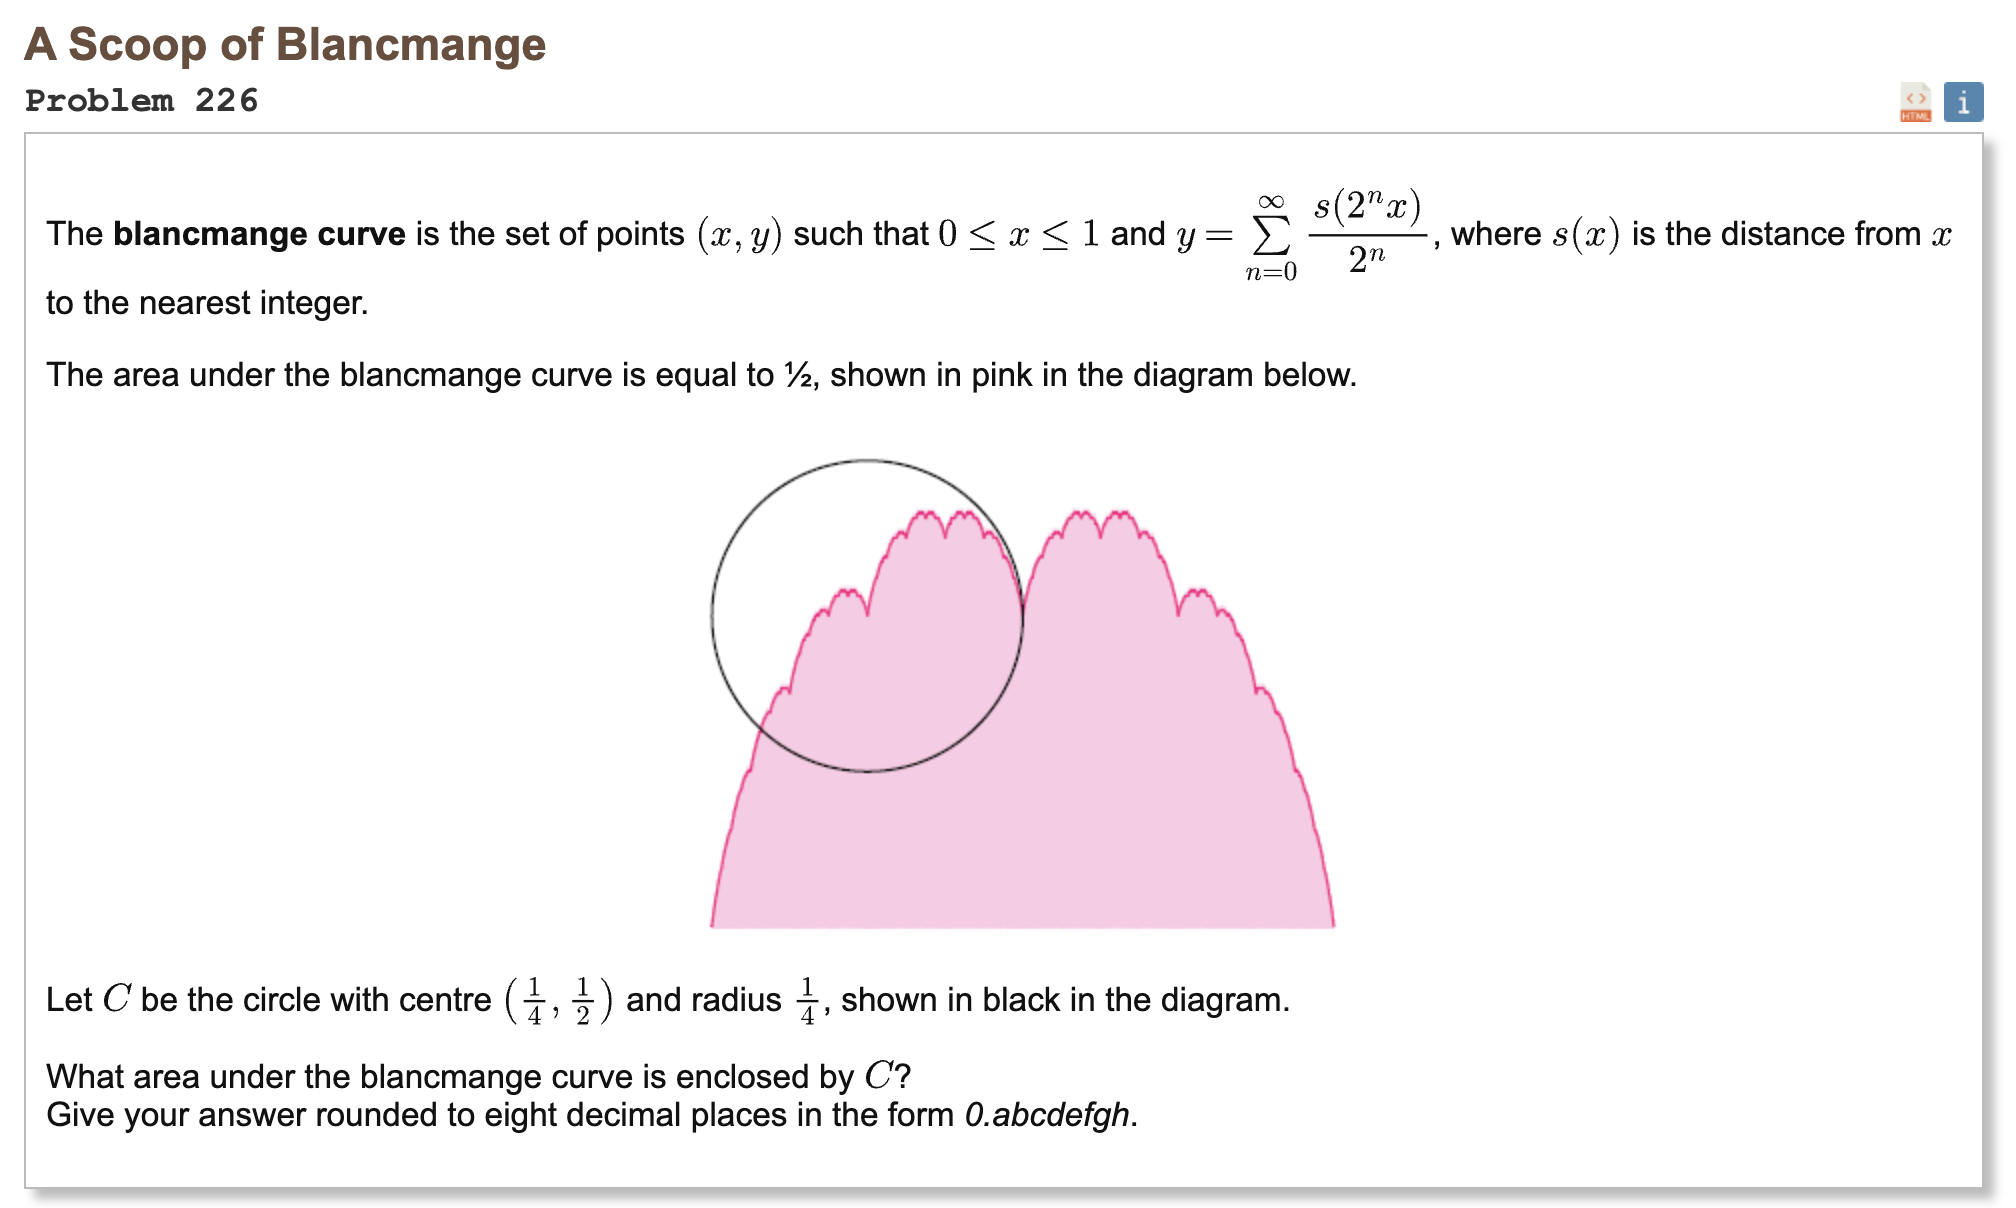

## Initial approach

* only the part of the area that lies inside the circle matters
* for each x inside the circle, the circle gives a bottom y level and a top y level
* in this problem the curve stays below the circle top, so the height is just curve minus circle bottom
* the useful x range starts where the curve first touches the circle bottom, and ends at the right edge of the circle
* find that first touch point with a simple bisection search
* approximate the area with a dense composite Simpson rule, which is stable enough for 8 decimals
* compute the blancmange value by adding smaller and smaller triangle wave terms until the remaining tail is tiny

In [1]:
import math

cx = 0.25
cy = 0.5
r = 0.25
r2 = r * r

def tri_dist_unit(x):
    y = x - math.floor(x)
    if y <= 0.5:
        return y
    return 1.0 - y

def blancmange(x, K=45):
    res = 0.0
    scale = 1.0
    xx = x
    for _ in range(K):
        res += scale * tri_dist_unit(xx)
        xx = (xx * 2.0) % 1.0
        scale *= 0.5
    return res

def circle_y_low(x):
    dx = x - cx
    inside = r2 - dx * dx
    if inside < 0.0:
        return None
    return cy - math.sqrt(max(0.0, inside))

def g(x):
    return blancmange(x) - circle_y_low(x)

def find_left_intersection():
    lo = 0.05
    hi = 0.08
    for _ in range(80):
        mid = (lo + hi) * 0.5
        if g(mid) > 0.0:
            hi = mid
        else:
            lo = mid
    return (lo + hi) * 0.5

def integrand(x):
    return blancmange(x) - circle_y_low(x)

def composite_simpson(a, b, N):
    h = (b - a) / N
    s0 = integrand(a) + integrand(b)
    s1 = 0.0
    s2 = 0.0
    x = a + h
    for i in range(1, N):
        fx = integrand(x)
        if i & 1:
            s1 += fx
        else:
            s2 += fx
        x += h
    return (h / 3.0) * (s0 + 4.0 * s1 + 2.0 * s2)

In [2]:
%%time
x1 = find_left_intersection()
area = composite_simpson(x1, 0.5, 262144)
result = f"{area:.8f}"
print("Result:", result)

Result: 0.11316017
CPU times: user 1.32 s, sys: 7.56 ms, total: 1.32 s
Wall time: 1.32 s
